<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

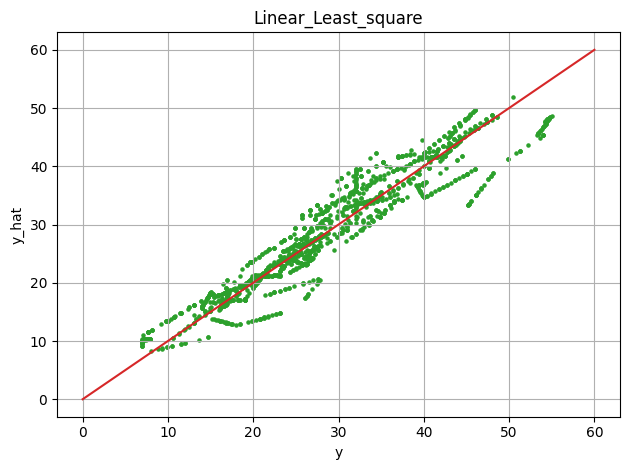

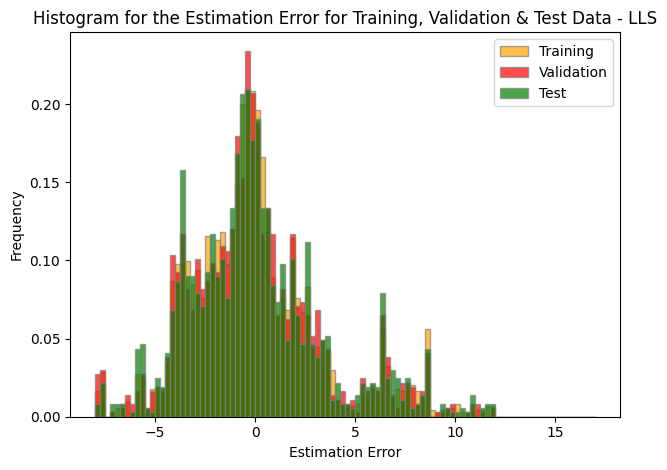

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 22 05:13:32 2021

@author: Kamran
"""

#%% Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

#%% Initialize Classes
# Define The Function to Print & to Plot Vector w_hat
class SolvMinProbl:
    def __init__(self, y, X, y_val, X_val, y_test, X_test, mean, stdt):

        # Whole Data Without 'subject#' & 'test_time'
        self.matr = X
        # Np = Number of Patients/Rows & Nf = Number of Features/Columns
        self.Np = X.shape[0]
        self.Nf = X.shape[1]
        # Initializing Test & Validation Data
        self.matr_val = X_val
        self.matr_test = X_test
        # Mean & Standard Deviation of Train Data
        self.mean = mean 
        self.stdt = stdt 
        # 'total_UPDRS' as Regressand
        self.vect = y
        self.vect_val = y_val
        self.vect_test = y_test
        # Optimum Weights w_hat (Column of Nf Entries)
        self.sol = np.zeros((self.Nf, 1), dtype = float)   
        self.err = 0
        self.mse = 0
        self.stat = 0
         #%% Define Mean Square Error
    def MSE_est(self):
        
        self.mse = np.zeros((3, 1), dtype = float)
        # Defination of Train, Validation & Test Data for y with Estimated Ones
        y_train = self.stdt * self.vect + self.mean
        y_train_estimated = self.stdt * np.dot(self.matr, self.sol) + self.mean
        
        y_val = self.stdt * self.vect_val + self.mean
        y_val_estimated = self.stdt * np.dot(self.matr_val,self.sol) + self.mean
        
        y_test = self.stdt * self.vect_test + self.mean
        y_test_estimated = self.stdt * np.dot(self.matr_test,self.sol) + self.mean
        
        # Calculate MSE for Train, Validation & Test Data
        self.mse[0] = (np.linalg.norm(y_train - y_train_estimated)**2) / self.matr.shape[0]
        self.mse[1] = (np.linalg.norm(y_val - y_val_estimated)**2)/self.matr_val.shape[0]
        self.mse[2] = (np.linalg.norm(y_test - y_test_estimated)**2) / self.matr_test.shape[0]
        
        return self.mse[0], self.mse[1], self.mse[2]
        
    #%% Statistical Properties
    def Stat_prop(self):
        self.stat = np.zeros((3, 2), dtype = float)
        # Defination of Train Data for y with Estimated One
        y_train = self.stdt * self.vect + self.mean
        y_train_estimated = self.stdt * np.dot(self.matr, self.sol) + self.mean
        # Calculate Mean & Standard Deviation of Train Data
        train_err = y_train - y_train_estimated
        self.stat[0][0] = train_err.mean()
        self.stat[0][1] = train_err.std()
        
        # Defination of Validation Data for y with Estimated One
        y_val = self.stdt * self.vect_val + self.mean
        y_val_estimated = self.stdt * np.dot(self.matr_val, self.sol) + self.mean
        # Calculate Mean & Standard Deviation of Validation Data
        val_err = y_val - y_val_estimated
        self.stat[1][0] = val_err.mean()
        self.stat[1][1] = val_err.std()
        
        # Defination of Test Data for y with Estimated One
        y_test = self.stdt * self.vect_test + self.mean
        y_test_estimated = self.stdt * np.dot(self.matr_test, self.sol) + self.mean
        # Calculate Mean & Standard Deviation of Test Data
        test_err = y_test- y_test_estimated
        self.stat[2][0] = test_err.mean()
        self.stat[2][1] = test_err.std()
        
        return self.stat

    #%% Coefficient Determination
    def Coeff_determ(self):
        self.R2 = np.zeros((3, 1), dtype = float)
        # Defination of Train Data for y with Estimated One
        y_train = self.stdt * self.vect + self.mean
        y_train_estimated = self.stdt * np.dot(self.matr, self.sol) + self.mean
        # Evaluate The Performance of a Linear Regression Model
        r2_train = r2_score(y_train , y_train_estimated)
        self.R2[0] = r2_train
        
        # Defination of Validation Data for y with Estimated One
        y_val = self.stdt * self.vect_val + self.mean
        y_val_estimated = self.stdt * np.dot(self.matr_val, self.sol) + self.mean
        # Evaluate The Performance of a Linear Regression Model
        r2_val = r2_score(y_val , y_val_estimated)
        self.R2[1] = r2_val
        
        # Defination of Test Data for y with Estimated One
        y_test = self.stdt * self.vect_test + self.mean
        y_test_estimated = self.stdt * np.dot(self.matr_test, self.sol) + self.mean
        # Evaluate The Performance of a Linear Regression Model
        r2_test = r2_score(y_test , y_test_estimated)
        self.R2[2] = r2_test
        
        return self.R2
    
     #%% Plotting Functions

    def comparison(self, title, labelx, labely, y, X, mean , stdt):
        plt.figure()
        w = self.sol
        y_estimated = (np.dot(X, w) * stdt) + mean
        # y Has to Be Unnormalized
        y = (y * stdt) + mean
        plt.plot(np.linspace(0, 60), np.linspace(0, 60), 'tab:red')
        plt.scatter(y, y_estimated, s = 5, color = 'tab:green')
        plt.xlabel(labelx)
        plt.ylabel(labely)
        plt.title(title)
        plt.grid()
        plt.tight_layout()
        # plt.savefig(title +'.png', dpi = 800)
        plt.show()
    
    def histogram(self, y, X, y_val, X_val, y_test, X_test, mean , stdt, title):
        plt.figure()
        w = self.sol
        # y_train Has to Be Unnormalized
        y_train = (y * stdt) + mean 
        y_train_estimated = (np.dot(X, w) * stdt) + mean
        plt.hist(y_train - y_train_estimated, bins = 100, histtype = 'bar',density = True , range = [-8,17],
                  edgecolor = 'gray', alpha = 0.7, color = 'orange', label = "Training")
        
        # y_valid Has to Be Unnormalized
        y_val = (y_val * stdt) + mean
        y_val_estimated = (np.dot(X_val, w) * stdt) + mean    
        plt.hist(y_val - y_val_estimated, bins = 100, histtype = 'bar',density = True , range = [-8,17], 
                  edgecolor = 'gray', alpha = 0.7, color = 'red', label = "Validation")
        
        # y_test Has to Be Unnormalized
        y_test = (y_test * stdt) + mean 
        y_test_estimated = (np.dot(X_test, w) * stdt) + mean        
        plt.hist(y_test - y_test_estimated, bins = 100,  histtype = 'bar',density = True , range = [-8,17], 
                  edgecolor = 'gray', alpha = 0.7, color = 'green', label = "Test")     
              
        plt.xlabel('Estimation Error')
        plt.ylabel('Frequency')
        plt.title('Histogram for the Estimation Error for Training, Validation & Test Data' + title)
        plt.legend(loc = 'best')
        plt.tight_layout()
        # plt.savefig(title +'.png', dpi = 800)
        plt.show()
      
    def plot_err(self, title, logy = 1, logx = 0):
        err = self.err
        plt.figure()
        # Train Data
        if(logy == 0) & (logx == 0):
            plt.plot(err[:, 0], err[:, 1], color = 'blue', label = 'Train')
        if (logy == 1) & (logx == 0):
            plt.semilogy(err[:, 0], err[:, 1], color = 'blue', label = 'Train')
        if (logy == 0) & (logx == 1):
            plt.semilogx(err[:, 0], err[:, 1], color = 'blue', label = 'Train')
        if (logy == 1) & (logx == 1):
            plt.loglog(err[:, 0], err[:, 1], color = 'blue', label = 'Train')
            # Validation Data
        if (logy == 0) & (logx == 0):
            plt.plot(err[:, 0], err[:, 2], alpha = 0.7, color = 'teal', label = 'Validation')
        if (logy == 1) & (logx == 0):
            plt.semilogy(err[:, 0], err[:, 2], alpha = 0.7, color = 'teal', label = 'Validation')
        if (logy == 0) & (logx == 1):
            plt.semilogx(err[:, 0], err[:, 2], alpha = 0.7, color = 'teal', label = 'Validation')
        if (logy == 1) & (logx == 1):
            plt.loglog(err[:, 0], err[:, 2], alpha = 0.7, color = 'teal', label = 'Validation')
        plt.xlabel('n')
        plt.ylabel('e(n)')
        plt.legend()
        plt.title(title)
        # Leave Some Space Between The Max/Min Value and The Frame of The Plot
        plt.margins(0.01, 0.1)
        plt.grid()
        plt.tight_layout()
        # plt.savefig(title + '.png', dpi = 800)
        plt.show()
    #%% LLS method
class LLS(SolvMinProbl):
    def run(self):
        
        X = self.matr
        X_val = self.matr_val
        X_test = self.matr_test
        
        y = self.vect
        y_val = self.vect_val
        y_test = self.vect_test
      
        w = np.random.rand(self.Nf, 1)
        w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        self.sol = w
        
        self.err = np.zeros((1, 4), dtype = float)
        
        # Errors on Standardized Vectors
        self.err[0, 1] = np.linalg.norm(y - np.dot(X, w))**2 / X.shape[0]
        self.err[0, 2] = np.linalg.norm(y_val - np.dot(X_val, w)) ** 2 / X_val.shape[0]
        self.err[0, 3] = np.linalg.norm(y_test - np.dot(X_test, w)) ** 2 / X_test.shape[0]
        return self.err[0, 1], self.err[0, 2], self.err[0, 3]
    
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%     MAIN CODE     %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
if __name__ == '__main__':

# Prepare and Analyze the Data
    plt.close('all')

    # Read The Dataset
    x = pd.read_csv("parkinsons_updrs.csv")
    x.info()
    # Statistical Description of The Content for Each Column
    z = x.describe().T 

    Features = list(x.columns)
    print("The List of Features is: ", Features)

    x1 = x.copy(deep = True)

    # Introducing New Data by Deleting Unwanted Items
    X = x1.drop(['subject#', 'sex', 'test_time',  
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA'], axis = 1)
    # Np = Number of Patients/Rows & Nf = Number of Features/Columns
    Np , Nf = X.shape

    #%% Create Shuffled Data
    np.random.seed(300262) # My IDnumber is s301000
    indexsh = np.arange(Np)
    np.random.shuffle(indexsh)
    X_shuffled = X.copy(deep=True)
    X_shuffled = X_shuffled.set_axis(indexsh, axis = 0) #, inplace = False removed
    X_shuffled = X_shuffled.sort_index(axis = 0)

    #%% Create Training, Validation & Test Data
    N_train = int(Np*0.5)
    N_valid = int(Np*0.25)
    N_test = Np - N_train - N_valid
    # Desired Feature as 'total_UPDRS'
    des_F = 2
    
    #%% Data Standard Deviation & Mean
    data_train = X_shuffled[0:N_train]
    data_val = X_shuffled[N_train:N_train + N_valid]
    data_test = X_shuffled[N_train + N_valid:]
     
   
    # Feature's Mean & Standard Deviation 
    Mean = np.mean(data_train.values, 0) 
    Standard_Dev = np.std(data_train.values, 0)
    
    data_train_norm = (data_train.values - Mean) / Standard_Dev
    data_val_norm = (data_val.values - Mean) / Standard_Dev
    data_test_norm = (data_test.values - Mean) / Standard_Dev

    #%% Data Subsets
    y_train = data_train_norm[:, des_F]  
    y_train = np.reshape(y_train,(2937,1))
    X_train = np.delete(data_train_norm, des_F, 1)

    y_val = data_val_norm[:, des_F]
    y_val = np.reshape(y_val,(1468,1))
    X_val = np.delete(data_val_norm, des_F, 1)
    
    y_test = data_test_norm[:, des_F]
    y_test = np.reshape(y_test,(1470,1))
    X_test = np.delete(data_test_norm, des_F, 1) 

    #%% Method Preparation
    # Statistical Properties for Error (Rows: Train, Validation, Test / Columns: Mean & Standard Deviation)
    LLS_stat = np.zeros((3, 2), dtype = float)
    GPR_stat = np.zeros((3, 2), dtype = float)
    
    MSE_train = np.zeros((2, 1), dtype = float)   
    MSE_val = np.zeros((2, 1), dtype = float)
    MSE_test = np.zeros((2, 1), dtype = float)
    
    # MSE Matrix for Values (Rows: MSE_train, MSE_valid, MSE_test / Columns: LLS, GPR)
    MSE_matr = np.zeros((3, 2), dtype = float) 
    
    # R^2 (Coefficient of Determination) Regression Score Function
    R2 = np.zeros((3,3), dtype = float)
    
    # Plotting Preparation
    logy = 1
    logx = 0
    
    #%% LLS Method
    a = LLS(y_train, X_train, y_val, X_val, y_test, X_test, Mean[des_F], Standard_Dev[des_F])
    MSE_train[0], MSE_val[0], MSE_test[0] = a.run()
    MSE_matr[:, 0] = np.array(a.MSE_est()).reshape(-1) #MSE_matr[:,0] = a.MSE_est()
    LLS_stat = a.Stat_prop()
    # Extracting Mean & Variance of The 'total_UPDRS'
    a.comparison('Linear_Least_square','y','y_hat', y_test, X_test, Mean[des_F], Standard_Dev[des_F])  
    a.histogram(y_train, X_train, y_val, X_val, y_test, X_test, Mean[des_F], Standard_Dev[des_F], ' - LLS')
    R2 = a.Coeff_determ()
   